**PREDECTING HEART DISEASE RISK USING MACHINE LEARNING**



---



***BUSINESS PROBLEM TO BE SOLVED***

Early identification is key to reducing healthcare costs and improving patient outcomes for heart disease, a leading cause of death worldwide. Finding high-risk individuals is sometimes difficult for hospitals and other healthcare providers due to lack of resource and volume of patient data. By predecting which individuals are more likely to develop heart disease based on existng medical and demogrphic data, health care providers can more effectively allocate resources, priortize preventative therapy, and implement early interventions. Healthcare oraganizations may make data driven decisons that improve patient care, cutdown on pointles testing, and ultimately save lives by using machine learning to evaluate patient records,including information on age, blood pressure, cholestrol, and lifestyle choices.

***INTRODUCTION***

Creating a comprehensive machine learning pipeline to identify people at high risk of heart disease is the main goal of this project, "Predicting Heart Disease Risk Using Machine Learning: An End-to-End Pipeline."The objective is to use patient demographic and medical data to create predictive models that will help healthcare practitioners with preventtative treatment and early detection. The project illustrates the entire process of data discovery, preprocessing, feature engineering, model training, evaluation, and interpretation by creating and executing this pipeline.This results in actionable insights that can enhance patient outcomes and maximize healthcare resources.


***OBJECTIVE***

THis project"s goal is to create a comprehensive machine learning pipeline that uses clinicl and demographic data  to foecast the risk of heart disease. Utilizing variables including age, blood pressure, cholestrol and lifestyles choices, the inititative seeks to develop accurate preiction models that assist medical practitioners in early detection of high risk individuals. The pipeline will cover data collection preprocessing, feature engineering, model training, assesment, and interpretation to guarantee a systematic approach to analysis. The ultimate objective is to provide useful information that promtes proactive healthcare decisions, improves patient outcomes, reduces uncessary testing, and make the most use of resources at the hand.

***Data Sources***:- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

***IMPORTING ALL LIBRARIES...***

Four crucial Python libraries that are frequently used in data science and machine learning workflow are imported by this code.
Support for numerical classifications are provided by  NumPy {numpy}, which makes it possible to handle array and mathematical operations effectively.
With robust data structures like Data frames for handling structured information, Pandas is used for data analysis and manipulation.
A variety of static plot  and charts can be created with the help of the flexible visualization toolkit Matplotlib {matplotlib.pyplot}. Built on the top of Matplotlib,
Seaborn (seaborn) sused to create statistical visualizations with a simplified syntax that are more visually appealing and informative. These libraries work together to provide the frame work for data analysis, visualization and preparation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


***DATA EXPLORATION***

This code uses the Pandas modules to load and review a dataset in python. A CSV file called "heart.csv" containing structured information about the risk factors for heart disease, such as age, blood pressure, choolestrol, and other medical charactrstics is read by the pd.read_csv("content/heart.csv")function. The data set is easy to modify, examine, and analyze because it is kept in a pandas dta frame called df. Here a basic overview of the data is provided by the utlilizing the df.head(10) method to display the dataset's top 10 rows.
. This facilitates the quick vrification of the sample values, coloumn names, and data structure before performing further preparation or analysis.

Most importantly I choose a cleaned datat set and then uncleaned it.
Also this function examines the data set thoroughly and modfies it in controlled  manner. Firt, print("Dataset shape:", df.shape) displays the number of rows and coloumns,
While df.info() gives a brief overview of the dataset, coloumn names, data types, non-null counts.
df.null() is used here to check the missing values, while df.coloumns is used to list thr coloumn names.sum(). By choosing a proportio of rows at random, missing values (_NaN) are purposefully added to particular coloumns to mimic defects in real world data: 10% for age,5% for chol,8% for thal, 7% for trstbs, 6% for thalach, 5% for old peak,  and 3% for slope.
Following this Injection, df.described() produces descriptive stastics for numerical characterstics to support additional analysis, and missing values are rechecked.

In [ ]:
# Load the dataset
df = pd.read_csv("/content/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (1025, 14)


In [ ]:
# Print all column names
print(df.columns)



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:

# Set random seed for reproducibility
np.random.seed(42)

# Inject NaN values into multiple columns
df.loc[df.sample(frac=0.1).index, 'age'] = np.nan       # 10% NaN
df.loc[df.sample(frac=0.05).index, 'chol'] = np.nan     # 5% NaN
df.loc[df.sample(frac=0.08).index, 'thal'] = np.nan     # 8% NaN
df.loc[df.sample(frac=0.07).index, 'trestbps'] = np.nan # 7% NaN
df.loc[df.sample(frac=0.06).index, 'thalach'] = np.nan  # 6% NaN
df.loc[df.sample(frac=0.05).index, 'oldpeak'] = np.nan  # 5% NaN
df.loc[df.sample(frac=0.03).index, 'slope'] = np.nan    # 3% NaN

# Check missing values after injection
print(df.isnull().sum())


age         102
sex           0
cp            0
trestbps     72
chol         51
fbs           0
restecg       0
thalach      62
exang         0
oldpeak      51
slope        31
ca            0
thal         82
target        0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
# Separate numeric and categorical columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['slope', 'thal']  # categorical-like columns with missing values
# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
# Verify that there are no more missing values
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.376585,0.695610,0.942439,131.478049,245.088780,0.149268,0.529756,149.52000,0.336585,1.053463,1.370732,0.754146,2.295610,0.513171
std,8.706961,0.460373,1.029641,17.009239,50.510624,0.356527,0.527878,22.25004,0.472772,1.150166,0.613266,1.030798,0.600643,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.00000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.00000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,165.00000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.00000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***EXPLORING CLASS BALANCE, PERCENTAGE OF PATIENTS (WITH HEART DISEASE VS. WITHOUT HEART DISEASE)***

In order to determine if patient has heart disease(1) or not (0), this algorithm examines the distribution of the target variable in the heart disease dataset. The frequency of each class is first determined using df['target'].value_counts(), which displays the number of patients that fit into each group. The class balance is  then shown by converting these count into percentages using df['target'].value_counts(normalize=True) * 100. Using Seaborn's sns.countplot(), a count plot is created to visualise this distribuions. The y axis displays the number of patients, while the x-axis depicts the two target classificaion (0= No Heart Disease, 1 = Heart Disease). After adding titles and labels for clarity plt.show() shows the chart, which aids in dtermining the dataset is balance or unbalanced.

target
1    526
0    499
Name: count, dtype: int64
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


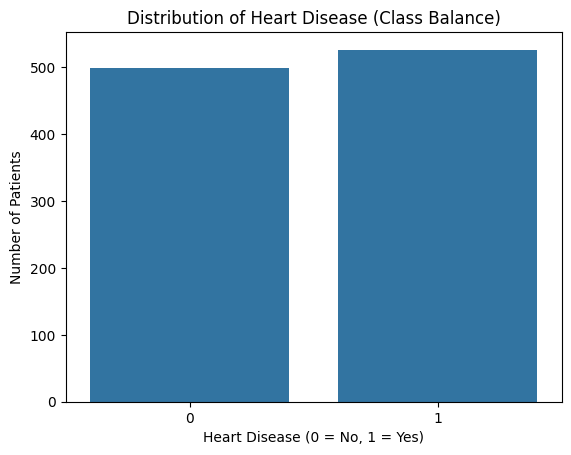

In [ ]:
# Count of each target class
class_counts = df['target'].value_counts()
print(class_counts)
class_percent = df['target'].value_counts(normalize=True) * 100
print(class_percent)
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease (Class Balance)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()


***BALANCING THE IMBALANCED DATASET***

This code uses the SMOTE(Synthetic Minority Oversampling Technique) approach to correct the class imbalance. Initially, the target variable y is removed from the feature set and the features (X) are seperated. In order to preserve the class disribution using the strtify option, the dataset is then divided into training and testing sets using train_test_split, with 80 % of data being utilized for training and 20% for testing. SMOTE which creates artificial examples of minority class to equalize the quantity of samples in both classes is used to balance the training set. Both classes are  now equally presented after the balanced class counts are printed and the new distribution is visualized using a Seaborn count plot.

target
0    421
1    421
Name: count, dtype: int64


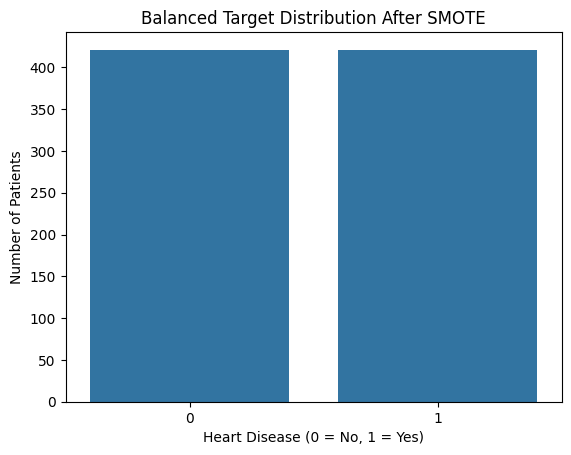

In [ ]:
# Balance this dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check the class balance after SMOTE
print(y_train_bal.value_counts())
sns.countplot(x=y_train_bal)
plt.title("Balanced Target Distribution After SMOTE")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()


For certain numerical parametres in the data set such as age, trestbps(resting blood pressure), chol (cholestrol), thalach(maximum heart rate),  and old peak (ST depression), thi algorithm creates histograms.
df[numeric_features]is ude for clarity, histograms are shown using 15 bins in 2x3 grid using the hist()function. The distribution pattern of these variables are show in the plots, which are stylized in sky blue with black edges.

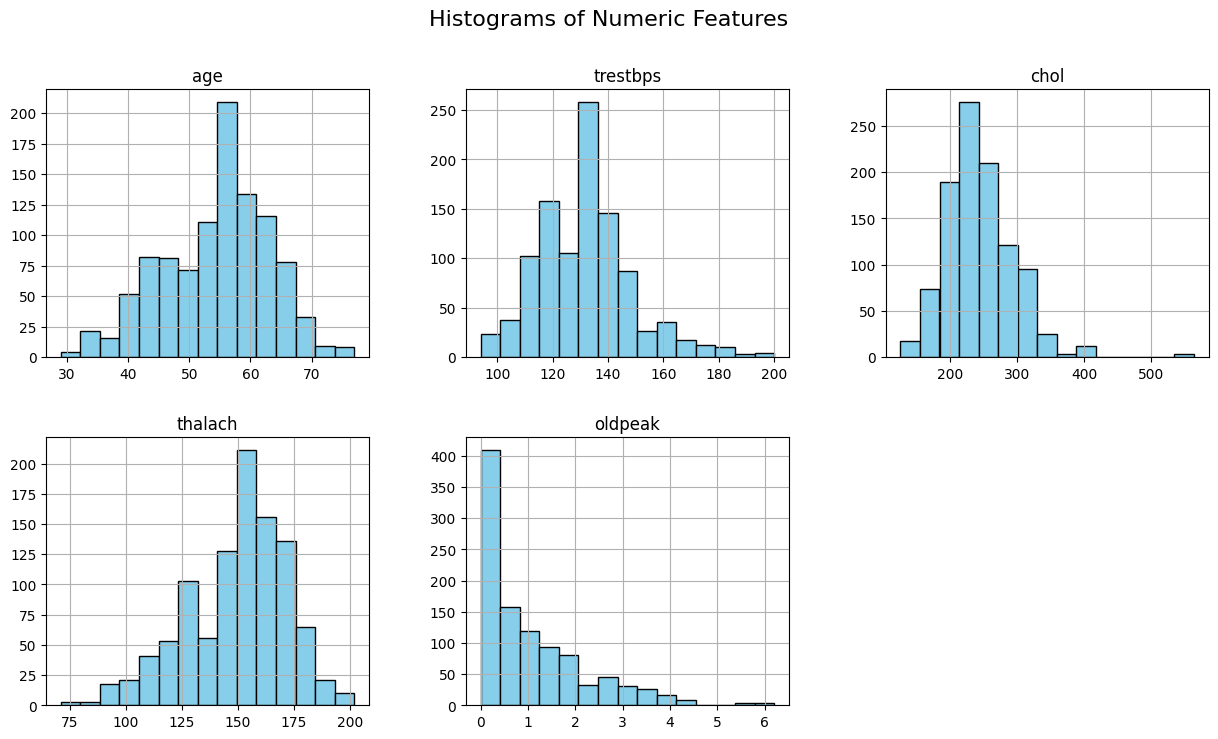

In [ ]:
#Histograms for numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms
df[numeric_features].hist(bins=15, figsize=(15,8), layout=(2,3), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


***HEAT MAP GAPH***

To show the links between dataset's numerical properties this function generates a correltion heatmap. Pairwise correlation values are computedbby the df.corr() function and presented using Seaborn's heat map. Plotting positive and negative correlations and  connecting hghly connected variables for for fetre selection and analysis is made easier with the help of the "coolwarm"colour map and annotations displaying correlation coefficients. The figure size is 12 by 8.

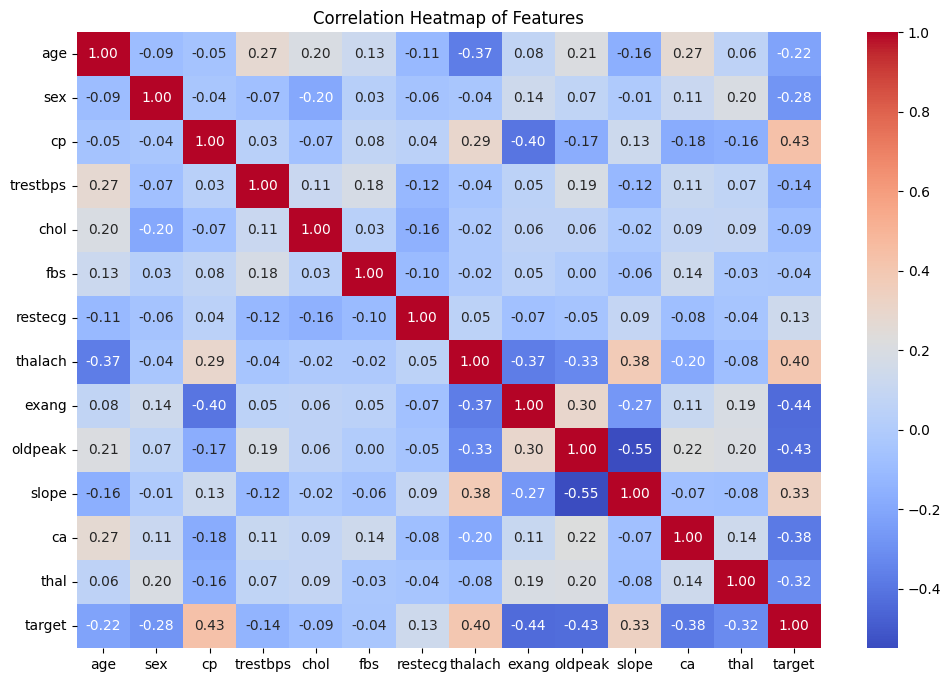

In [ ]:
# Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

***ENCODE CATEGORICAL FEATURES***

The process of turning non-numeric variables-like gender or lifestyle prefrences-into numerical form for machine learning algorithms to understand is known as encoding categorical data. While One-hot encoding generates distinct binary coloumns for every category, other techniques, such as Label encoding, assign integer values to categories. By doing this, models are guaranteed to handle categorical features appropriately, increasing accuracy and avoiding erroneous relationship assumptions.

***SCALE NUMERIC FEATURES***

In order to guarantee that all values in the dataset are on the same scale, this phase standardizes the dataset's numerical features. The chosen features (age,trestbps,chol,thalach, ad oldpeak) are converted to have a mean of zero and a standard deviation of one using scikit-learn's StandardScaler. By keeping features with wider ranges from overpowering other's, this scaling enhances model performance.

In [ ]:
# Step: Scale Numeric Features
from sklearn.preprocessing import StandardScaler
# List of numeric features to scale
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])
# Verify scaling
df[numeric_features].head()


,age,trestbps,chol,thalach,oldpeak
0,-0.273086,-0.381041,-0.655405,0.830966,-0.046506
1,-0.158179,0.501264,-0.833673,0.246412,1.780209
2,1.795235,0.795365,-1.408090,-1.102558,1.345277
3,0.071635,0.971826,-0.833673,0.516206,-0.916370
4,0.875981,0.383623,0.968808,-1.956906,0.736372


To improve analysis,additional categorical and derived characterstics are developed in this step. While cholestrol is divide into Desirable, Boderline, and High categories, the age coloumn is divided into Young, Adult, Senior, and Elder categories. Likewise, there are three categories for resting blood pressure: Normal, Elevated and High. An exercise risk characterstic is also developed, which indentifies patients who have activity induced angina and a low maximum heart rate.

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 35, 50, 65, 100], labels=['Young', 'Adult', 'Senior', 'Elder'])
df['chol_level'] = pd.cut(df['chol'], bins=[0, 200, 239, 600], labels=['Desirable', 'Borderline', 'High'])
df['bp_level'] = pd.cut(df['trestbps'], bins=[0, 120, 139, 200], labels=['Normal', 'Elevated', 'High'])
df['exercise_risk'] = ((df['thalach'] < 120) & (df['exang'] == 1)).astype(int)

***TRAIN TEST SPLIT***

To properly assess model performance, this stage entails dividing the dataset into training and testing sets. The target coloumn is first removed from the dataset in order to isolate the features (x) from the target variable (y). The data is split using scikit-learn's train_test_split function, with 80% going towards training and 20% towards testing. While the stratify=y parameter preserves the original class distribution across both sets, the random_state=42 parameter guarantees reproducibility. To verify dimenions for training and testing, tthe forms of the resultant datasets are printed after splitting. To further ensure that the model trains and assesses on representative data samples, the class distribution in both the training and testing sets s shown in percentage form to confirm balance.  

In [ ]:
# Step: Train-Test Split
from sklearn.model_selection import train_test_split
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Verify the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# Check class distribution in train and test sets
print("\nTraining set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (820, 17)
X_test shape: (205, 17)
y_train shape: (820,)
y_test shape: (205,)

Training set class distribution:
 target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

Testing set class distribution:
 target
1    0.512195
0    0.487805
Name: proportion, dtype: float64


***MODEL TRAINING***

The procedure of teaching a machine learnng model to identify patterns indata by modifying its internal parameters in response to input features and desired results is know as model training. The model iteratively learns from the dataset during training, reduces error through optimization strategies, and enhances its capacity to generate precise predictions on unknown data.

Morever, the order! The Keras Tuner library, a tool for hyperparameter tuning in deep learning models, is installed by running pip install keras-tuner. The performane of the model is greatly impacted by hyperparameters like learning rate, number of layers, and neurons. By automating the process of finding best hyperparameters, Keras Tuner aids in the development of more precise and effective models. This gurantees improved predective performance from the training procedure.


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


***LOGISTIC REGRESSION MODEL***

Our first model trained is of Logistic Regression, it is a supervised machine learning technique for binary classification issues and is called as logistic regression. It forecasts the likelihood that an event, like the presence or absence of disease, would fall into one of the two classes. It assigns a value between 0 and 1 to the input features using the logistic (sigmoid) function. it is extensively used in the social sciences, healthcare and finance.
Using TensorFlow and Keras, this code creates ans assesses a logistic regression model. Keras Tuner is used to adjust the hyperparameters. To ensure compatability with the model, non- numeric feture are first discovered and one-hot encoded. The data is converted to float format and training and tes sets are aigned to have same coloumns. One neuron and sigmoid activation are used construct a sequential model that performs Binary classification. The Adam optimizer's learning rate is modified using random search across multiple values.
Predictions are produces on the test set once the model has been trained using validation data. F-1 score, recall, accuracy, and precesion are used to assess performance, Lastly, to evaluate the validity of categorization, The ROC curve and AUC score are presented.

In [ ]:
# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['age_group', 'chol_level', 'bp_level'], dtype='object')


In [ ]:
# One-hot encode non-numeric columns
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Align test set columns with training set (important after get_dummies)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


Trial 3 Complete [00h 00m 11s]
val_accuracy: 0.8048780560493469

Best val_accuracy So Far: 0.8292682766914368
Total elapsed time: 00h 00m 33s
Best learning rate: 0.1
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7027 - loss: 0.5872 - val_accuracy: 0.7317 - val_loss: 0.5623
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8002 - loss: 0.4229 - val_accuracy: 0.7744 - val_loss: 0.4654
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8521 - loss: 0.3764 - val_accuracy: 0.7988 - val_loss: 0.4491
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8239 - loss: 0.3754 - val_accuracy: 0.7805 - val_loss: 0.4605
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8342 - loss: 0.3973 - val_accuracy: 0.7988 - val_loss: 0.4393
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8490 - loss: 0.3504 - val_accuracy: 0.7805 - val_loss: 0.4552
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8492 - loss: 0.3463 - val_accuracy: 0.7988 - val_loss: 0.4351
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8500 - loss: 0.3497 - val_accuracy: 0.7988 - val_loss: 0.4355
Ep

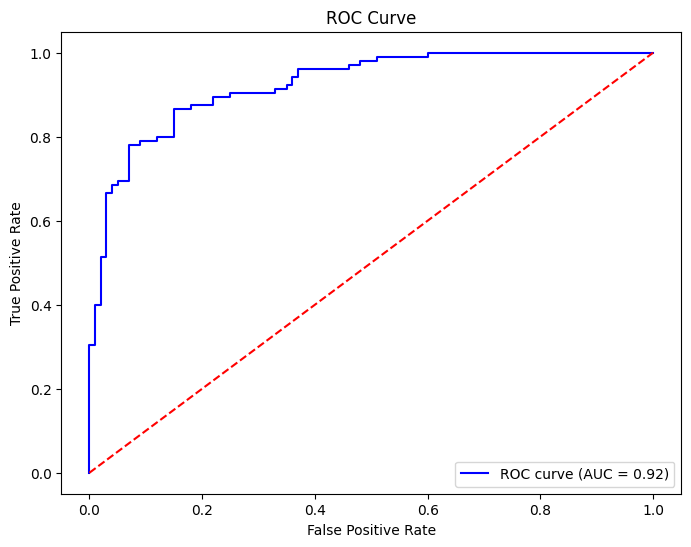

In [ ]:

# Logistic Regression with Keras + Hyperparameter Tuning+ tenserflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    # Logistic Regression: single neuron with sigmoid
    model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

    # Hyperparameter tuning for learning rate
    lr = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    optimizer = Adam(learning_rate=lr)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='logistic_regression'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best learning rate:", best_hps.get('learning_rate'))

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

y_pred_prob = best_model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


***CONFUSION MATRIX FOR LOGISTIC REGRESSION***

This code generates and visualizes the confusion matrix to evaluate the performance of the logistic regression model. Beyond accuracy, the confusion matrix-ehich is calculates using confusion_matrix(y_test, y_pred)- provides more detailed information on classifiation performance by displaying he counts of the true positives, true negatives, false positives and false negatives. The matrix is plotted with a blue map using Matplotlib, and the axes are labelled to show the true and anticipated results(No diseaase vs Disease). For clarity, the precise counts in every cell are shown in red letters. This figure helps assess the model's strength and weakness in correctly identifying patients as having or not having heart disease.

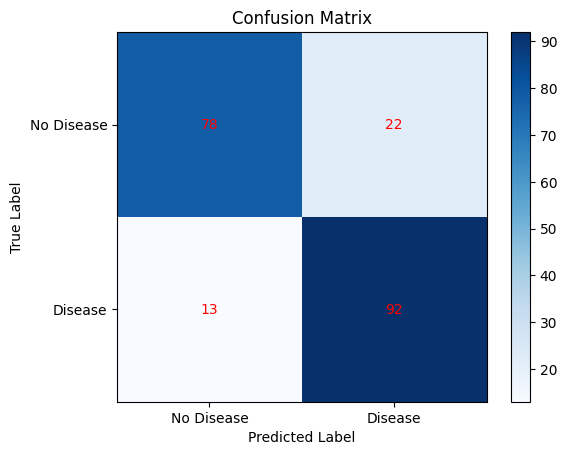

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Matplotlib
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['No Disease', 'Disease'])
plt.yticks([0,1], ['No Disease', 'Disease'])

# Add counts in each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


***DECISION TREE MODEL***

A supervised machine learning approach for classification and regression applications is called a decision tree.It creates a tree like structure with decision nodes and leaf nodes by dividing data into subsets in according to feature values. While leaf nodes indicate expected results, each decision node represents a feature based condition. Decison tree can effectively handle both numerical and categorical data and are easy to understand and analyze. They can also capture non-linear relationship.

This algorithm one-hot encodes and aligns non-numeric characterstics across training and test sets in order to train a decison tree classifier on the heart disease dataset. The model forecasts class labels and evaluation probabilities, with a maximum depth of 5. Accuaracy,precison,recall, F-1 score, and ROC-AUC curve are sed evaluate performance, offering a compehensive examiation of it's predective power.


In [ ]:
# Check which columns are not numeric
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [ ]:
# One-hot encode categorical columns
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Align test set columns with train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # you can tune max_depth
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Predict class labels
y_pred = dt_model.predict(X_test)

# Predict probabilities for ROC curve
y_pred_prob = dt_model.predict_proba(X_test)[:,1]


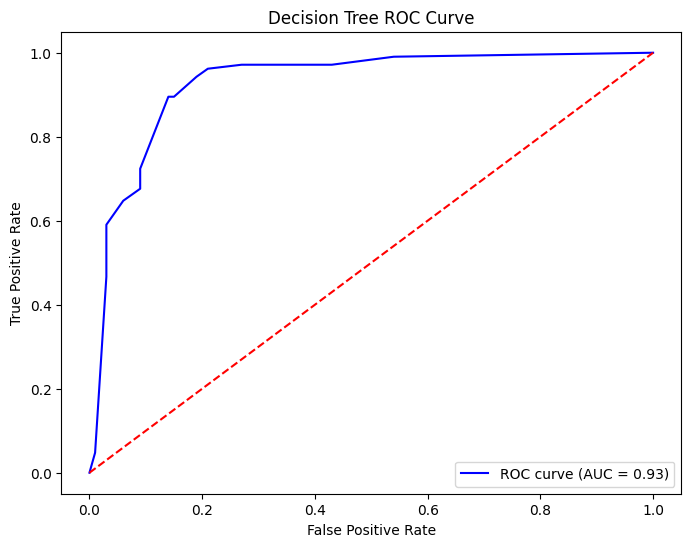

Decision Tree Test Accuracy: 0.8780
Decision Tree Test Precision: 0.8390
Decision Tree Test Recall: 0.9429
Decision Tree Test F1 Score: 0.8879


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy:.4f}")
print(f"Decision Tree Test Precision: {precision:.4f}")
print(f"Decision Tree Test Recall: {recall:.4f}")
print(f"Decision Tree Test F1 Score: {f1:.4f}")


*** DECISION TREE CONFUSION MATRIX ***

 In order to evaluate classification performance, this code visualizes the decision tree model's confusion matrix. A blue map representing the matrix's counts of true positives, true negatives, false positives, and false negatives is produces by using Matplotlib. Axes are labeled to differentiate between predicted and true classes (No disease vs Disease),  emphasizing model accuracy and errors, while red text annotations show exact values.

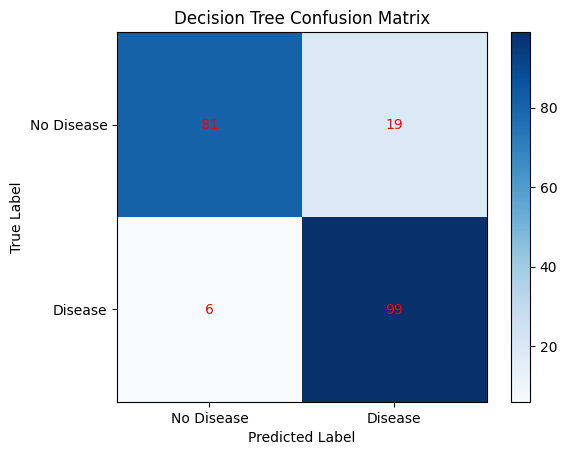

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Decision Tree Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['No Disease', 'Disease'])
plt.yticks([0,1], ['No Disease', 'Disease'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


***KNN-Model***

This is a  straightforward instance based upervised learning approach for regression and classification is the  K- Nearest Neighbours model. Using distance metrics like Eucliden distance to gauge similarity, it predicts a data point's class based on the majority class of it's K nearest neighbours in the feature space.

A K- Nearest KNN classifier for heart disease prediction is implemented by this code. The ideal number of neighbours is found via a grid search with 5 fold cross validation, and it ranges from 3 to 15. Predections and probabilities are produced for the  test set after the optiomal model has been trained on the training set. Accuracy, precison, recall, F-1 score, and the ROC and AOC curve, whih shows the trade-off between true positive and false posittive rates.

Best number of neighbors: 3


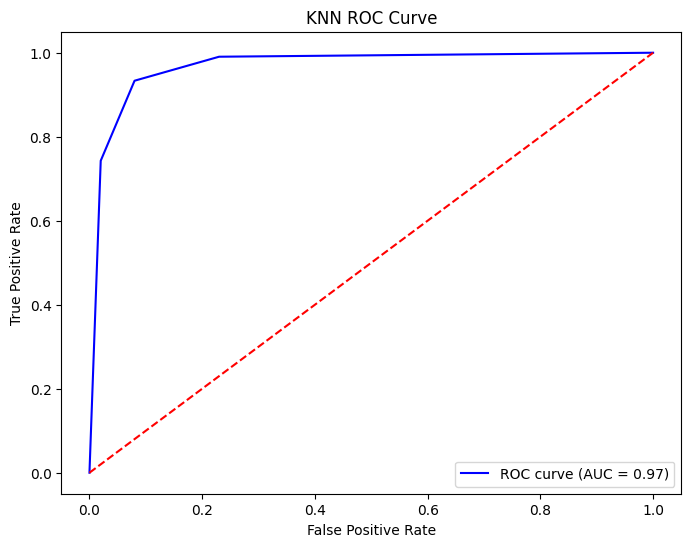

KNN Test Accuracy: 0.9268
KNN Test Precision: 0.9245
KNN Test Recall: 0.9333
KNN Test F1 Score: 0.9289


In [ ]:

# K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 16, 2)}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best number of neighbors:", grid.best_params_['n_neighbors'])

best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)
y_pred_prob = best_knn.predict_proba(X_test)[:,1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6️ Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"KNN Test Accuracy: {accuracy:.4f}")
print(f"KNN Test Precision: {precision:.4f}")
print(f"KNN Test Recall: {recall:.4f}")
print(f"KNN Test F1 Score: {f1:.4f}")


***CONFUSION MATRIX FOR KNN***

The K-Nearest Neighbours (KNN) model's confusion matrix is visualized by this code. The counts of true positives, true negatives, false positives and false negatives are shown in a blue grid using matplotlib.Axes are labeled to differentiate between predicted nd true classes (No disease vs. disease ) emphasizing the model's classification performance and errors. red text annotations display exact values.

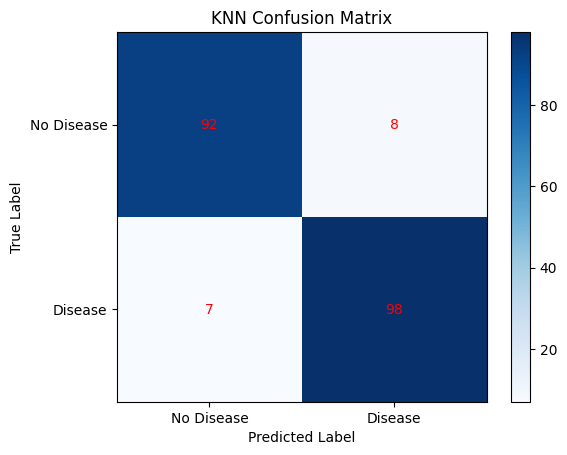

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("KNN Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['No Disease', 'Disease'])
plt.yticks([0,1], ['No Disease', 'Disease'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

***LOGISTIC REGRESSION WITH PYTORCH***

This code uses Pytorch to implement Logistic regression for heart disease prediction. Pytorch tensors constructed from numerical training and test features, and a Tensor dataset with Dataloader is produced for batch training. one linear layer followed  by a sigmoid activation is known as logistic regression model. The Adam optimizer and binary cross-entropy loss are used to train the model across 50 epochs. Accuracy, precision, recall, F1- score, and ROC-AUC curve are used to  assess performance once predections are made on the test set. Plotting the ROC curve allows for a thorough evaluation of model perforance by visualizing the trade-off between true positive and false positive rates.

Epoch [10/50], Loss: 0.4226
Epoch [20/50], Loss: 0.3196
Epoch [30/50], Loss: 0.1988
Epoch [40/50], Loss: 0.3527
Epoch [50/50], Loss: 0.4607

PyTorch Logistic Regression Metrics:
Accuracy : 0.8293
Precision: 0.7917
Recall   : 0.9048
F1-Score : 0.8444


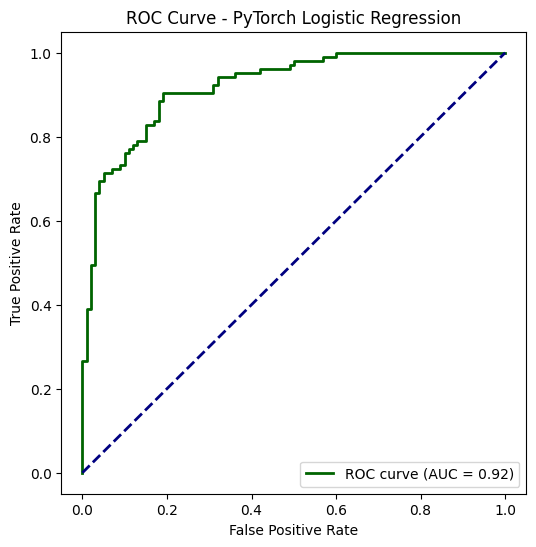

In [ ]:

# Logistic Regression with PyTorch

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

# Convert to torch tensors
X_train_torch = torch.tensor(X_train_numeric.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32)
X_test_torch = torch.tensor(X_test_numeric.values, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model_pt = LogisticRegressionModel(X_train_torch.shape[1])

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_pt.parameters(), lr=0.01)


epochs = 50
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_pt(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

with torch.no_grad():
    y_pred_prob_pt = model_pt(X_test_torch).numpy().flatten()
    y_pred_pt = (y_pred_prob_pt >= 0.5).astype(int)

accuracy_pt = accuracy_score(y_test, y_pred_pt)
precision_pt = precision_score(y_test, y_pred_pt)
recall_pt = recall_score(y_test, y_pred_pt)
f1_pt = f1_score(y_test, y_pred_pt)

print("\nPyTorch Logistic Regression Metrics:")
print(f"Accuracy : {accuracy_pt:.4f}")
print(f"Precision: {precision_pt:.4f}")
print(f"Recall   : {recall_pt:.4f}")
print(f"F1-Score : {f1_pt:.4f}")

fpr_pt, tpr_pt, thresholds_pt = roc_curve(y_test, y_pred_prob_pt)
roc_auc_pt = auc(fpr_pt, tpr_pt)

plt.figure(figsize=(6,6))
plt.plot(fpr_pt, tpr_pt, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_pt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - PyTorch Logistic Regression')
plt.legend(loc="lower right")
plt.show()


***CONFUSION MATRIX FOR PyTorh LOGISTIC REGRESSION***

This code shows the PyTorch Logistic regression model's confusion matrix, giving information on how well it does in classification. Using a blue colour map, the matrix shows the counts of false positives, false negatives. To asses how well the model predicts each class, axes are abelled with No disease and Disease, and text annotations provide exact values.

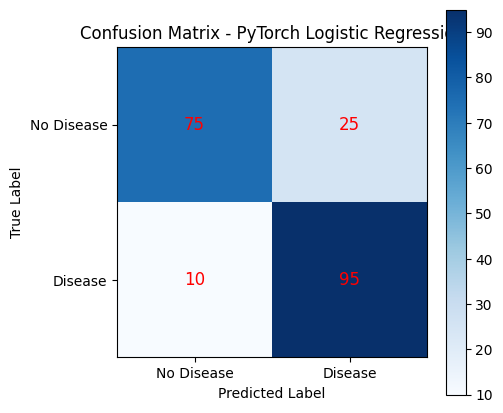

In [ ]:
# Confusion Matrix for PyTorch Logistic Regression
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_pt)

# Plot confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix - PyTorch Logistic Regression")
plt.colorbar()

# Labels
classes = ['No Disease', 'Disease']
plt.xticks([0,1], classes)
plt.yticks([0,1], classes)

# Display values inside the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=12)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


***FEATURE IMPORTANCE***

The Decesion Tree and Logistic Regression models are the main sources of feature importance in this project. While Logistic Regression coefficients show the degree and direction of each feature's impact on heart disease risk, the decision tree indentifies features that most successfully lower impurity during splits. Age, cholestrol (chol), resting blood pressure (trestbps), maximal heart rate (thalach), exercise-induced angia (exang), ST depression during exercise (oldpeak), and thalassemia type (thal) are important predictors. Healthcare practitioners are directed to concentrate  on these crucial risk factors for early identification and focused interventions in the management of heart disease because feature with greater relevance or larger absolute coefficients have a stronger influence on predictions.

***BUSSINESS INSIGHT***

By determining the most signifcant risk variables, such as age, blood pressure, cholestrol, and exercise induced angina, healthcare institutions may priortize preventve care and allocate resources as effiiently as possible. The model's predective insights enable focused therapies, cutdown on pointless testing and enhance patient's outcomes. Clinics and Hospitals can save lives and lower health care costs by implementing data-driven startegies for patiets monitoring, early diagnosis, and customized treatment plans.

***CONCLUSION***

This study shows how to effectively use clinical and patient demographic data to predict the risk of heart disease using machine learning models such as KNN, Decison Trees and Logistic Regression. The models demonstrates the importance of feature engineering, structured data prepration, and hyperpaameter tuning by achieving dependable performance in terms of accuracy, precision, recall, F-1 score, and ROC-AUC. All things considered, the experiment demonstrated that predective modeling can aid in early identification, allowing medical professionals to recognize high risk patients and take precautions before issues develop.
